# __Tarea 1:__ 

1. Nombre: Juan Luis   
1. Apellido: Fernández Abreu
1. Correo: juuanfz@gmail.com
--------

# PARTE II

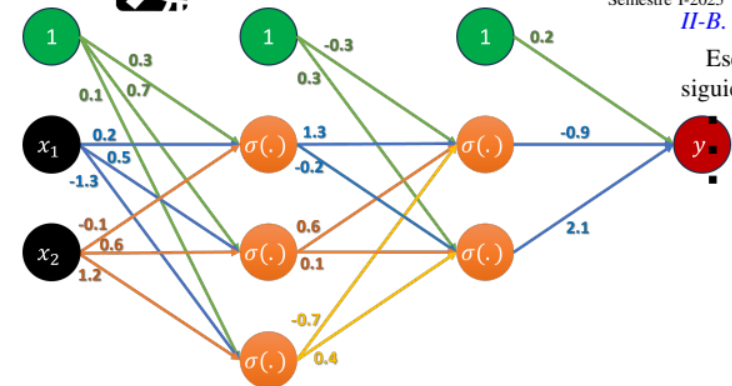

### Calcula analíticamente el gradiente mediante  backpropagation, desarrollando todos los pasos correspondientes

#### Paso 1: Propagación hacia adelante

Usamos la red neuronal mostrada, con activación **sigmoide** y pérdida **MSE**, para el ejemplo:

$$(x_1, x_2, y)_1 = (1, 1, 1)$$

Paso 1: Propagación hacia adelante

Entrada:

$$x = \begin{bmatrix} 1 \\ 1 \end{bmatrix}$$


### Capa oculta 0 (h₁, h₂, h₃)

Cálculo de preactivaciones:

$$f_0 = \Omega_0 x + \beta_0 =
\begin{bmatrix}
0.2 & -0.1 \\
0.5 & 0.6 \\
-1.3 & 1.2
\end{bmatrix}
\cdot
\begin{bmatrix}
1 \\
1
\end{bmatrix}
=
\begin{bmatrix}
0.1 \\
1.1 \\
-0.1
\end{bmatrix}
+
\begin{bmatrix}
0.3 \\
0.7 \\
0.1
\end{bmatrix}
=
\begin{bmatrix}
0.4 \\
1.8 \\
0.0
\end{bmatrix}
$$

Activación sigmoide:

$$
\sigma(t) = \frac{1}{1 + e^{-t}}
$$

Para $t = 0.4$:

$$
\sigma(0.4) = \frac{1}{1 + e^{-0.4}} = \frac{1}{1 + 0.6703} = \frac{1}{1.6703} \approx 0.5987
$$

Para $t = 1.8$:

$$
\sigma(1.8) = \frac{1}{1 + e^{-1.8}} = \frac{1}{1 + 0.1653} = \frac{1}{1.1653} \approx 0.8581
$$

Para $t = 0.0$:

$$
\sigma(0.0) = \frac{1}{1 + e^{0}} = \frac{1}{1 + 1} = \frac{1}{2} = 0.5
$$

$$
h_1 = \sigma(f_0) =
\begin{bmatrix}
\sigma(0.4) \\
\sigma(1.8) \\
\sigma(0.0)
\end{bmatrix}
\approx
\begin{bmatrix}
0.5987 \\
0.8581 \\
0.5
\end{bmatrix}
$$



### Capa oculta 1 (h₄, h₅)

Cálculo de preactivaciones:

$$
f_1 = \Omega_1 h_1 + \beta_1=
    \begin{bmatrix}
    1.3 & 0.6 & -0.7 \\
    -0.2 & 0.1 & 0.4
    \end{bmatrix}
    \cdot
    \begin{bmatrix}
    0.5987 \\
    0.8581 \\
    0.5
    \end{bmatrix}
    +
    \begin{bmatrix}
    -0.3 \\
    0.3
    \end{bmatrix}
$$

Calculamos:

$$
f_1 =
\begin{bmatrix}
(1.3)(0.5987) + (0.6)(0.8581) + (-0.7)(0.5) - 0.3 \\
(-0.2)(0.5987) + (0.1)(0.8581) + (0.4)(0.5) + 0.3
\end{bmatrix}
\approx
\begin{bmatrix}
0.64317 \\
0.46607
\end{bmatrix}
$$

Activaciones:

$$
\sigma(t) = \frac{1}{1 + e^{-t}}
$$

Para $t = 0.64317$:

$$
\sigma(0.64317) = \frac{1}{1 + e^{-0.64317}} = \frac{1}{1 + 0.5256} = \frac{1}{1.5256} \approx 0.6554
$$

Para $t = 0.46607$:

$$
\sigma(0.46607) = \frac{1}{1 + e^{-0.46607}} = \frac{1}{1 + 0.6274} = \frac{1}{1.6274} \approx 0.6144
$$




### Salida

Cálculo de preactivación de salida:

$$
f_2 = \beta_2 +  \Omega_2 h_2=
\begin{bmatrix}
-0.9 & 2.1
\end{bmatrix}
\cdot
\begin{bmatrix}
0.6554 \\
0.6144
\end{bmatrix}
+ 0.2
= -0.58986 + 1.29024 + 0.2 \approx 0.9004
$$

Activación:

$$
\sigma(t) = \frac{1}{1 + e^{-t}}
$$

$$
\hat{y} = \sigma(0.9004) \approx 0.7110
$$



###  Paso 2: Pérdida

$$
\mathcal{L} = \frac{1}{2}(1 - 0.7110)^2 \approx 0.0418
$$

### Paso 3: Backpropagation

Salida:

$$
\delta_2 = (\hat{y} - y) \cdot \hat{y}(1 - \hat{y}) =
(0.7110 - 1)(0.7110)(1 - 0.7110) \approx -0.0594
$$


Capa oculta 1:

$$
\delta_1 =
(\Omega_2^\top \delta_2) \circ (h_2 \circ (1 - h_2)) =
\begin{bmatrix}
-0.9 \\
2.1
\end{bmatrix}
\cdot (-0.0594)
\circ
\begin{bmatrix}
0.6554(1 - 0.6554) \\
0.6144(1 - 0.61)
\end{bmatrix}
$$

$$
\delta_1 \approx
\begin{bmatrix}
0.05346 \\
-0.12474
\end{bmatrix}
\circ
\begin{bmatrix}
0.2258 \\
0.2370
\end{bmatrix}
=
\begin{bmatrix}
0.0120 \\
-0.0295
\end{bmatrix}
$$


Capa oculta 0:

$$
\delta_0 =
(\Omega_1^\top \delta_1) \circ (h_1 \circ (1 - h_1))
$$

Primero el producto:

$$
\Omega_1^\top \delta_1 =
\begin{bmatrix}
1.3 & -0.2 \\
0.6 & 0.1 \\
-0.7 & 0.4
\end{bmatrix}
\cdot
\begin{bmatrix}
0.0120 \\
-0.0295
\end{bmatrix}
=
\begin{bmatrix}
0.0215 \\
0.0042 \\
-0.0202
\end{bmatrix}
$$

Ahora aplicamos sigmoide derivada:

$$
\sigma'(f_0) =
\begin{bmatrix}
\sigma(0.4)(1 - \sigma(0.4)) \\
\sigma(1.8)(1 - \sigma(1.8)) \\
\sigma(0.0)(1 - \sigma(0.0))
\end{bmatrix}
$$

Usamos los valores aproximados de las activaciones:

$$
=
\begin{bmatrix}
0.5987(1 - 0.5987) \\
0.8581(1 - 0.8581) \\
0.5(1 - 0.5)
\end{bmatrix}
$$

Finalmente, operamos:

$$
\sigma'(f_0) \approx
\begin{bmatrix}
0.2402 \\
0.1217 \\
0.25
\end{bmatrix}
$$

Resultado:

$$
\delta_0 =
\begin{bmatrix}
0.0215 \\
0.0042 \\
-0.0202
\end{bmatrix}
\circ
\begin{bmatrix}
0.2402 \\
0.1217 \\
0.25
\end{bmatrix}
\approx
\begin{bmatrix}
0.0052 \\
0.0005 \\
-0.0051
\end{bmatrix}
$$

### Gradientes

Salida:

$$
\nabla_{\Omega_2} = \delta_2 \cdot h_2^\top =
-0.0594 \cdot
\begin{bmatrix}
0.6554 & 0.6144
\end{bmatrix}
=
\begin{bmatrix}
-0.0389 & -0.0365
\end{bmatrix}
$$

$$
\nabla_{\beta_2} = \delta_2 = -0.0594
$$


Capa oculta 1:

$$
\nabla_{\Omega_1} =
\begin{bmatrix}
0.0120 \\
-0.0295
\end{bmatrix}
\cdot
\begin{bmatrix}
0.5987 & 0.8581 & 0.5
\end{bmatrix}
=
\begin{bmatrix}
0.0072 & 0.0103 & 0.0060 \\
-0.0176 & -0.0253 & -0.0148
\end{bmatrix}
$$

$$
\nabla_{\beta_1} = \delta_1 = 
\begin{bmatrix}
0.0120 \\
-0.0295
\end{bmatrix}
$$


Capa oculta 0:

$$
\nabla_{\Omega_0} =
\delta_0 \cdot x^\top =
\begin{bmatrix}
0.0052 \\
0.0005 \\
-0.0051
\end{bmatrix}
\cdot
\begin{bmatrix}
1 & 1
\end{bmatrix}
=
\begin{bmatrix}
0.0052 & 0.0052 \\
0.0005 & 0.0005 \\
-0.0051 & -0.0051
\end{bmatrix}
$$

$$
\nabla_{\beta_0} = \delta_0 = 
\begin{bmatrix}
0.0052 \\
0.0005 \\
-0.0051
\end{bmatrix}
$$

## Ahora con  $$(x_1, x_2, y)_2 = (-1, 1, 0)$$

Paso 1: Propagación hacia adelante

Entrada:

$$
x =
\begin{bmatrix}
-1 \\
1
\end{bmatrix}, \quad y = 0
$$


### Capa oculta 0 (h₁, h₂, h₃)

Cálculo de preactivaciones:

$$f_0 = \Omega_0 x + \beta_0 =
\begin{bmatrix}
0.2 & -0.1 \\
0.5 & 0.6 \\
-1.3 & 1.2
\end{bmatrix}
\cdot
\begin{bmatrix}
-1 \\
1
\end{bmatrix}
+
\begin{bmatrix}
0.3 \\
0.7 \\
0.1
\end{bmatrix}
=
\begin{bmatrix}
0.0 \\
0.8 \\
2.6
\end{bmatrix}
$$

Activación sigmoide:

$$
h_1 = \sigma(f_0) \approx
\begin{bmatrix}
0.5 \\
0.6899 \\
0.9309
\end{bmatrix}
$$



### Capa oculta 1 (h₄, h₅)

Cálculo de preactivaciones:

$$
f_1 = \Omega_1 h_1 + \beta_1 =
\begin{bmatrix}
1.3 & 0.6 & -0.7 \\
-0.2 & 0.1 & 0.4
\end{bmatrix}
\cdot
\begin{bmatrix}
0.5 \\
0.6899 \\
0.9309
\end{bmatrix}
+
\begin{bmatrix}
-0.3 \\
0.3
\end{bmatrix}
$$

Calculamos:

$$
f_1 \approx
\begin{bmatrix}
0.65 + 0.4139 - 0.6516 \\
-0.1 + 0.0690 + 0.3724
\end{bmatrix}
+
\begin{bmatrix}
-0.3 \\
0.3
\end{bmatrix}
=
\begin{bmatrix}
0.1123 \\
0.6414
\end{bmatrix}
$$

Activaciones:

$$
h_2 = \sigma(f_1) \approx
\begin{bmatrix}
\sigma(0.1123) \\
\sigma(0.6414)
\end{bmatrix}
\approx
\begin{bmatrix}
0.5281 \\
0.6550
\end{bmatrix}
$$



### Salida

Cálculo de preactivación de salida:
$$
\Omega_2 =
\begin{bmatrix}
-0.9 & 2.1
\end{bmatrix},
\quad
\beta_2 = 0.2
$$

Con:

$$
h_2 =
\begin{bmatrix}
0.5281 \\
0.6550
\end{bmatrix}
$$

$$
f_2 = \Omega_2 h_2 + \beta_2 =
(-0.9)(0.5281) + (2.1)(0.6550) + 0.2
$$

$$
f_2 = -0.4753 + 1.3755 + 0.2 \approx 1.1002
$$

Activación:

$$
\hat{y} = \sigma(f_2) = \frac{1}{1 + e^{-1.1002}} \approx 0.7503
$$



###  Paso 2: Pérdida

$$
\mathcal{L} = \frac{1}{2}(\hat{y}-y)^2 = \frac{1}{2}(0.7503)^2 \approx 0.2815
$$

### Paso 3: Backpropagation

Salida:

$$
\delta_2 = (\hat{y} - y) \cdot \hat{y}(1 - \hat{y}) =
(0.7503)(0.7503)(1 - 0.7503)
\approx -0.1873
$$



Capa oculta 1:

$$
\sigma(f_1) \approx
\begin{bmatrix}
0.5281 \\
0.6550
\end{bmatrix}
$$

$$
\sigma'(f_1) =
\begin{bmatrix}
0.5281(1 - 0.5281) \\
0.6550(1 - 0.6550)
\end{bmatrix}
=
\begin{bmatrix}
0.2492 \\
0.2261
\end{bmatrix}
$$

$$
\Omega_2^\top =
\begin{bmatrix}
-0.9 \\
2.1
\end{bmatrix}
\quad \Rightarrow \quad
\Omega_2^\top \delta_2 =
\begin{bmatrix}
-0.9 \cdot 0.7503 \cdot (1 - 0.7503) \\
2.1 \cdot 0.7503 \cdot (1 - 0.7503)
\end{bmatrix}
=
\begin{bmatrix}
-0.2243 \\
0.4748
\end{bmatrix}
\cdot (-0.1873)
=
\begin{bmatrix}
0.0420 \\
-0.0890
\end{bmatrix}
$$


Capa oculta 0:

$$
\delta_0 =
(\Omega_1^\top \delta_1) \circ (h_1 \circ (1 - h_1))
$$

Primero el producto:

$$
\Omega_1^\top \delta_1 =
\begin{bmatrix}
1.3 & -0.2 \\
0.6 & 0.1 \\
-0.7 & 0.4
\end{bmatrix}
\cdot
\begin{bmatrix}
-0.0420 \\
0.0890
\end{bmatrix}
=
\begin{bmatrix}
-0.0546 \\
-0.0151 \\
0.0542
\end{bmatrix}
$$

Ahora aplicamos sigmoide derivada:

$$
\sigma'(f_0) =
\begin{bmatrix}
\sigma(0.5)(1 - \sigma(0.5)) \\
\sigma(0.6899)(1 - \sigma(0.6899)) \\
\sigma(0.9309)(1 - \sigma(0.9309))
\end{bmatrix}
$$

Operamos:

$$
=
\begin{bmatrix}
0.25 \\
0.2135 \\
0.0643
\end{bmatrix}
$$
Resultado:

$$
\delta_0 =
\begin{bmatrix}
-0.0546 \\
-0.0151 \\
0.0542
\end{bmatrix}
\circ
\begin{bmatrix}
0.25 \\
0.2135 \\
0.0643
\end{bmatrix}
\approx
\begin{bmatrix}
-0.0137 \\
-0.0032 \\
0.0035
\end{bmatrix}
$$

### Gradientes

Salida:

$$
\nabla_{\Omega_2} = \delta_2 \cdot h_2^\top =
-0.1873 \cdot
\begin{bmatrix}
0.5281 & 0.6550
\end{bmatrix}
=
\begin{bmatrix}
0.0989 & -0.01227
\end{bmatrix}
$$

$$
\nabla_{\beta_2} = \delta_2 = -0.1873
$$


Capa oculta 1:

$$
\nabla_{\Omega_1} =
\begin{bmatrix}
-0.0420 \\
0.0890
\end{bmatrix}
\cdot
\begin{bmatrix}
0.5 & 0.6899 & 0.9309
\end{bmatrix}
=
\begin{bmatrix}
-0.0210 & -0.0290 & -0.0392 \\
0.0445 & 0.0614 & 0.0828
\end{bmatrix}
$$

$$
\nabla_{\beta_1} = \delta_1 = 
\begin{bmatrix}
-0.0420  \\
0.0890
\end{bmatrix}
$$


Capa oculta 0:

$$
\nabla_{\Omega_0} =
\delta_0 \cdot x^\top =
\begin{bmatrix}
-0.0137 \\
-0.0032 \\
0.0035
\end{bmatrix}
\cdot
\begin{bmatrix}
-1 & 1
\end{bmatrix}
=
\begin{bmatrix}
0.0137 & -0.0137 \\
0.0032 & -0.0032 \\
-0.0035 & 0.0035
\end{bmatrix}
$$

$$
\nabla_{\beta_0} = \delta_0 = 
\begin{bmatrix}
-0.0137 \\
-0.0032 \\
0.0035
\end{bmatrix}
$$

## Ahora con  $$(x_1, x_2, y)_2 = (0, 2, 1)$$

Paso 1: Propagación hacia adelante

Entrada:

$$
x =
\begin{bmatrix}
0 \\
2
\end{bmatrix}, \quad y = 1
$$


### Capa oculta 0 (h₁, h₂, h₃)

Cálculo de preactivaciones:

$$f_0 = \Omega_0 x + \beta_0 =
\begin{bmatrix}
0.2 & -0.1 \\
0.5 & 0.6 \\
-1.3 & 1.2
\end{bmatrix}
\cdot
\begin{bmatrix}
0 \\
2
\end{bmatrix}
+
\begin{bmatrix}
0.3 \\
0.7 \\
0.1
\end{bmatrix}
=
\begin{bmatrix}
0.1 \\
1.9 \\
2.5
\end{bmatrix}
$$

Activación sigmoide:

$$
h_1 = \sigma(f_0) \approx
\begin{bmatrix}
0.5249 \\
0.8699 \\
0.9241
\end{bmatrix}
$$



### Capa oculta 1 (h₄, h₅)

Cálculo de preactivaciones:

$$
f_1 = \Omega_1 h_1 + \beta_1 =
\begin{bmatrix}
1.3 & 0.6 & -0.7 \\
-0.2 & 0.1 & 0.4
\end{bmatrix}
\cdot
\begin{bmatrix}
0.5249 \\
0.8699 \\
0.9241
\end{bmatrix}
+
\begin{bmatrix}
-0.3 \\
0.3
\end{bmatrix}
$$

Calculamos:

$$
f_1 \approx
\begin{bmatrix}
0.6824 + 0.5219 - 0.6469 \\
-0.1050 + 0.0870 + 0.3696
\end{bmatrix}
+
\begin{bmatrix}
-0.3 \\
0.3
\end{bmatrix}
=
\begin{bmatrix}
0.2574 \\
0.6516
\end{bmatrix}
$$

Activaciones:

$$
h_2 = \sigma(f_1) \approx
\begin{bmatrix}
\sigma(0.2574) \\
\sigma(0.6516)
\end{bmatrix}
\approx
\begin{bmatrix}
0.5639 \\
0.6573
\end{bmatrix}
$$



### Salida

Cálculo de preactivación de salida:
$$
\Omega_2 =
\begin{bmatrix}
-0.9 & 2.1
\end{bmatrix},
\quad
\beta_2 = 0.2
$$

Con:

$$
h_2 =
\begin{bmatrix}
0.5639 \\
0.6573
\end{bmatrix}
$$

$$
f_2 = \Omega_2 h_2 + \beta_2 =
(-0.9)(0.5639) + (2.1)(0.6573) + 0.2
$$

$$
f_2 = -0.5075 + 1.3803 + 0.2 \approx 1.0728
$$

Activación:

$$
\hat{y} = \sigma(f_2) = \frac{1}{1 + e^{-1.0728}} \approx 0.7451
$$



###  Paso 2: Pérdida

$$
\mathcal{L} = \frac{1}{2}(\hat{y}-y)^2 = \frac{1}{2}(0.7451-1)^2 = \frac{1}{2}(-0.2549)^2 \approx 0.0325
$$

### Paso 3: Backpropagation

Salida:

$$
\delta_2 = (\hat{y} - y) \cdot \hat{y}(1 - \hat{y}) =
(-0.2549)(0.7451)(1 - 0.7451)
\approx -0.0485
$$



Capa oculta 1:

$$
\delta_1 =
(\Omega_2^\top \delta_2) \circ (h_2 \circ (1 - h_2)) =
\begin{bmatrix}
-0.9 \\
2.1
\end{bmatrix}
\cdot (-0.0485)
\circ
\begin{bmatrix}
0.5639(1 - 0.5639) \\
0.6573(1 - 0.6573)
\end{bmatrix}
$$

$$
\delta_1 \approx
\begin{bmatrix}
0.0437 \\
-0.1019
\end{bmatrix}
\circ
\begin{bmatrix}
0.2460 \\
0.2253
\end{bmatrix}
=
\begin{bmatrix}
0.0108 \\
-0.0229
\end{bmatrix}
$$


Capa oculta 0:

$$
\delta_0 =
(\Omega_1^\top \delta_1) \circ (h_1 \circ (1 - h_1))
$$

Primero el producto:

$$
\Omega_1^\top \delta_1 =
\begin{bmatrix}
1.3 & -0.2 \\
0.6 & 0.1 \\
-0.7 & 0.4
\end{bmatrix}
\cdot
\begin{bmatrix}
0.0108 \\
-0.0229
\end{bmatrix}
=
\begin{bmatrix}
0.0140 \\
0.0041 \\
-0.0137
\end{bmatrix}
$$

Ahora aplicamos sigmoide derivada:

$$
\sigma'(f_0) =
\begin{bmatrix}
0.5249(1 - 0.5249) \\
0.8699(1 - 0.8699) \\
0.9241(1 - 0.9241)
\end{bmatrix}
=
\begin{bmatrix}
0.2494 \\
0.1134 \\
0.0700
\end{bmatrix}
$$

Resultado:

$$
\delta_0 =
\begin{bmatrix}
0.0140 \\
0.0041 \\
-0.0137
\end{bmatrix}
\circ
\begin{bmatrix}
0.2494 \\
0.1134 \\
0.0700
\end{bmatrix}
\approx
\begin{bmatrix}
0.0035 \\
0.0005 \\
-0.0010
\end{bmatrix}
$$


### Gradientes

Salida:

$$
\nabla_{\Omega_2} = \delta_2 \cdot h_2^\top =
-0.0485 \cdot
\begin{bmatrix}
0.5693 & 0.6573
\end{bmatrix}
=
\begin{bmatrix}
-0.0273 & -0.00319
\end{bmatrix}
$$

$$
\nabla_{\beta_2} = \delta_2 = -0.0485
$$


Capa oculta 1:

$$
\nabla_{\Omega_1} =
\delta_1 \cdot h_1^\top =
\begin{bmatrix}
0.0108 \\
-0.0229
\end{bmatrix}
\cdot
\begin{bmatrix}
0.5249 & 0.8699 & 0.9241
\end{bmatrix}
=
\begin{bmatrix}
0.0057 & 0.0094 & 0.0100 \\
-0.0120 & -0.0199 & -0.0211
\end{bmatrix}
$$


Capa oculta 0:

$$
\nabla_{\Omega_0} =
\delta_0 \cdot x^\top =
\begin{bmatrix}
0.0035 \\
0.0005 \\
-0.0010
\end{bmatrix}
\cdot
\begin{bmatrix}
0 & 2
\end{bmatrix}
=
\begin{bmatrix}
0.0000 & 0.0070 \\
0.0000 & 0.0010 \\
0.0000 & -0.0020
\end{bmatrix}
$$

$$
\nabla_{\beta_0} = \delta_0 =
\begin{bmatrix}
0.0035 \\
0.0005 \\
-0.0010
\end{bmatrix}
$$

### Gradiente total de la red

Capa de salida:


$$
\nabla_{\Omega_2} =
\begin{bmatrix}
-0.0273 & -0.0319
\end{bmatrix}
+
\begin{bmatrix}
-0.0389 & -0.0365
\end{bmatrix}
+
\begin{bmatrix}
0.0989 & -0.0123
\end{bmatrix}
=
\begin{bmatrix}
0.0327 & -0.0807
\end{bmatrix}
$$

$$
\nabla_{\beta_2} =
-0.0485 + (-0.0594) + (-0.1873) = -0.2952
$$

---

Capa oculta 1

$$
\nabla_{\Omega_1} =
\begin{bmatrix}
0.0057 & 0.0094 & 0.0100 \\
-0.0120 & -0.0199 & -0.0211
\end{bmatrix}
+
\begin{bmatrix}
0.0072 & 0.0103 & 0.0060 \\
-0.0176 & -0.0253 & -0.0148
\end{bmatrix}
+
\begin{bmatrix}
-0.0210 & -0.0290 & -0.0392 \\
0.0445 & 0.0614 & 0.0828
\end{bmatrix}
=
\begin{bmatrix}
-0.0081 & -0.0093 & -0.0232 \\
0.0149 & 0.0162 & 0.0469
\end{bmatrix}
$$

$$
\nabla_{\beta_1} =
\begin{bmatrix}
0.0108 \\
-0.0229
\end{bmatrix}
+
\begin{bmatrix}
0.0120 \\
-0.0295
\end{bmatrix}
+
\begin{bmatrix}
-0.0420 \\
0.0890
\end{bmatrix}
=
\begin{bmatrix}
-0.0192 \\
0.0366
\end{bmatrix}
$$

---

Capa oculta 0

$$
\nabla_{\Omega_0} =
\begin{bmatrix}
0.0000 & 0.0070 \\
0.0000 & 0.0010 \\
0.0000 & -0.0020
\end{bmatrix}
+
\begin{bmatrix}
0.0052 & 0.0052 \\
0.0005 & 0.0005 \\
-0.0051 & -0.0051
\end{bmatrix}
+
\begin{bmatrix}
0.0137 & -0.0137 \\
0.0032 & -0.0032 \\
-0.0035 & 0.0035
\end{bmatrix}
=
\begin{bmatrix}
0.0189 & -0.0015 \\
0.0037 & -0.0017 \\
-0.0086 & -0.0036
\end{bmatrix}
$$

$$
\nabla_{\beta_0} =
\begin{bmatrix}
0.0035 \\
0.0005 \\
-0.0010
\end{bmatrix}
+
\begin{bmatrix}
0.0052 \\
0.0005 \\
-0.0051
\end{bmatrix}
+
\begin{bmatrix}
-0.0137 \\
-0.0032 \\
0.0035
\end{bmatrix}
=
\begin{bmatrix}
-0.0050 \\
-0.0022 \\
-0.0026
\end{bmatrix}
$$


### Vector Gradiente Total

$$
\nabla J(\theta) =
\begin{bmatrix}
\nabla_{\Omega_2} \\
\nabla_{\beta_2} \\
\nabla_{\Omega_1} \\
\nabla_{\beta_1} \\
\nabla_{\Omega_0} \\
\nabla_{\beta_0}
\end{bmatrix}
=
\begin{bmatrix}
0.0327 \\
-0.0807 \\
-0.2952 \\
-0.0081 \\ 
-0.0093 \\
-0.0232 \\
0.0149 \\
0.0162 \\
0.0469 \\
-0.0192 \\
0.0366 \\
0.0189 \\
-0.0015 \\
0.0037 \\
-0.0017 \\
-0.0086 \\
-0.0036 \\
-0.0050 \\
-0.0022 \\
-0.0026
\end{bmatrix}
$$


### Modifique  la  ecuación  7.25  para  la  nueva  función de activación:

$$
\frac{\partial \ell_i}{\partial \beta_k} = \frac{\partial \ell_i}{\partial f_k}, \quad k \in \{K, K-1, \ldots, 1\}
$$

$$
\frac{\partial \ell_i}{\partial \Omega_k} = \frac{\partial \ell_i}{\partial f_k} \cdot h_k^\top, \quad k \in \{K, K-1, \ldots, 1\}
$$

$$
\frac{\partial \ell_i}{\partial f_{k-1}} = \sigma'(f_{k-1}) \odot \left( \Omega_k^\top \frac{\partial \ell_i}{\partial f_k} \right), \quad k \in \{K, K-1, \ldots, 1\}
$$

El indicador 

$$
I[f_{k-1} > 0]
$$ 

(que es la derivada de la ReLU) se reemplaza por (usando la Sugerencia de más abajo):

$$
\sigma'(f_{k-1})
$$ 

que es la derivada de la función de activación general.


Ahora, en el ejercicio nos definen la sigmoide,  por ende:

$$
\frac{\partial \ell_i}{\partial f_{k-1}} = \left( \sigma(f_{k-1}) \cdot \left(1 - \sigma(f_{k-1})\right) \right) \odot \left( \Omega_k^\top \frac{\partial \ell_i}{\partial f_k} \right), \quad k \in \{K, K-1, \ldots, 1\}
$$



### La actualización de los pesos se realiza mediante:

$$
w_{\text{new}} = w_{\text{old}} - \eta \cdot \nabla J(\theta)
$$

$$
w_{\text{new}} = w_{\text{old}} - (1) \cdot \nabla J(\theta)
$$

Entonces:

### Nuevos pesos (Descenso de Gradiente, η = 1)

Para cada conexión se utiliza la regla:

$$
w_{\text{new}} = w_{\text{old}} - \nabla J(\theta)
$$

---

#### Salida (y):
- Neurona z1 → y:
$$
w_{\text{new}} = -0.9 - (0.0327) = -0.9327
$$
- Neurona z2 → y:
$$
w_{\text{new}} = 2.1 - (-0.0807) = 2.1807
$$
- Bias → y:
$$
w_{\text{new}} = 0.2 - (-0.2952) = 0.4952
$$

---

#### Capa oculta 1 (h → z):
- h1 → z1:
$$
w_{\text{new}} = 1.3 - (-0.0081) = 1.3081
$$
- h2 → z1:
$$
w_{\text{new}} = 0.6 - (-0.0093) = 0.6093
$$
- h3 → z1:
$$
w_{\text{new}} = -0.7 - (-0.0232) = -0.6768
$$
- h1 → z2:
$$
w_{\text{new}} = -0.2 - (0.0149) = -0.2149
$$
- h2 → z2:
$$
w_{\text{new}} = 0.1 - (0.0162) = 0.0838
$$
- h3 → z2:
$$
w_{\text{new}} = 0.4 - (0.0469) = 0.3531
$$

- Bias → z1:
$$
w_{\text{new}} = -0.3 - (-0.0192) = -0.2808
$$
- Bias → z2:
$$
w_{\text{new}} = 0.3 - (0.0366) = 0.2634
$$

---

#### Capa oculta 0 (x → h):
- x1 → h1:
$$
w_{\text{new}} = 0.2 - (0.0189) = 0.1811
$$
- x2 → h1:
$$
w_{\text{new}} = -0.1 - (-0.0015) = -0.0985
$$
- x1 → h2:
$$
w_{\text{new}} = 0.5 - (0.0037) = 0.4963
$$
- x2 → h2:
$$
w_{\text{new}} = 0.6 - (-0.0017) = 0.6017
$$
- x1 → h3:
$$
w_{\text{new}} = -1.3 - (-0.0086) = -1.2914
$$
- x2 → h3:
$$
w_{\text{new}} = 1.2 - (-0.0036) = 1.2036
$$

- Bias → h1:
$$
w_{\text{new}} = 0.3 - (-0.0050) = 0.3050
$$
- Bias → h2:
$$
w_{\text{new}} = 0.1 - (-0.0022) = 0.1022
$$
- Bias → h3:
$$
w_{\text{new}} = 0.7 - (-0.0026) = 0.7026
$$
